# Define the sinusoid signal and plot it.

#### Zu-Cheng Chen, Feb 2019

In [1]:
# load packages
using PyPlot, WAV
#using Plots
using FFTW
using DSP
import LinearAlgebra: norm, reverse

## Define the sinusoid signal.
The signal is  by
$$
s(t) = A \sin(2\pi \phi(t)),
$$
where $A$ is the $snr$, and the phase is given by
$$
\phi(t) = a_1 t + a_2 t^2 + a_3 t^3.
$$

In [2]:
"""
Generate a quadratic chirp signal
S = CRCBGENQSIG(X,SNR,C)
Generates a quadratic chirp signal S. X is the vector of
time stamps at which the samples of the signal are to be computed. SNR is
the matched filtering signal-to-noise ratio of S and C is the vector of
three coefficients [a1, a2, a3] that parametrize the phase of the signal:
a1*t+a2*t^2+a3*t^3. 
"""
function crcbgenqcsig(dataX, snr::Real, qcCoefs::Array)
    phaseVec = qcCoefs[1]*dataX + qcCoefs[2]*dataX.^2 + qcCoefs[3]*dataX.^3;
    sigVec = sin.(2π*phaseVec)
    sigVec = snr*sigVec/norm(sigVec)
end

# test the function
crcbgenqcsig(1, 1, [1, 1, 1]), crcbgenqcsig([1,2], 1, [1, 1, 1])

(-1.0, [-0.209529, -0.977802])

In [3]:
?crcbgenqcsig

search: crcbgenqcsig



Generate a quadratic chirp signal S = CRCBGENQSIG(X,SNR,C) Generates a quadratic chirp signal S. X is the vector of time stamps at which the samples of the signal are to be computed. SNR is the matched filtering signal-to-noise ratio of S and C is the vector of three coefficients [a1, a2, a3] that parametrize the phase of the signal: a1*t+a2*t^2+a3*t^3. 


## Spectrogram demo

In [4]:
sampFreq = 1024;
nSamples = 2048;
timeVec = (0:(nSamples-1))/sampFreq;
timeVec = collect(timeVec);

In [5]:
# Quadratic chirp signal
# Signal parameters
a1=10;
a2=3;
a3=10;
A = 10;
fs=sampFreq;

In [6]:
# Generate signal
sigVec = crcbgenqcsig(timeVec,A,[a1,a2,a3]);

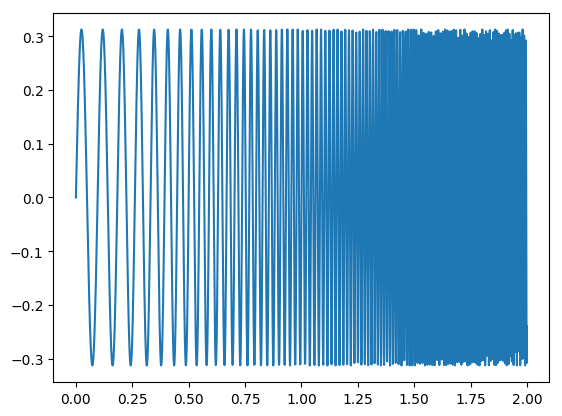

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe14a408908>

In [7]:
plot(timeVec, sigVec)

In [19]:
# Make spectrogram with different time-frequency resolution
S = spectrogram(sigVec, 128, 127; fs=sampFreq)

DSP.Periodograms.Spectrogram{Float64,Frequencies}([0.000344835 0.000374765 … 7.29438e-7 7.50574e-8; 0.00477264 0.00490573 … 1.47953e-6 1.62934e-7; … ; 3.42716e-7 2.81863e-7 … 5.94165e-7 6.80877e-7; 1.71254e-7 1.40846e-7 … 2.96819e-7 3.40153e-7], [0.0, 8.0, 16.0, 24.0, 32.0, 40.0, 48.0, 56.0, 64.0, 72.0  …  440.0, 448.0, 456.0, 464.0, 472.0, 480.0, 488.0, 496.0, 504.0, 512.0], 0.0625:0.0009765625:1.9375)

In [22]:
last(f)

512.0

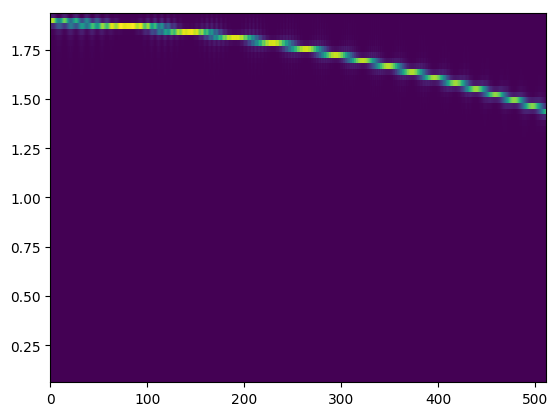

PyObject <matplotlib.image.AxesImage object at 0x7fe1483dbeb8>

In [33]:
# PyPlot includes a specgram function, but let's use the native implementation in DSP.jl
# The function below takes a spectrogram with standard parameters for speech (25ms Hanning windows/10ms overlap),
# plots it and returns the spectrogram in case we want to do something with it.

flipud(A) = reverse(A, dims = 1)

t = time(S)
f = freq(S)
imshow(power(S), extent=[first(f), last(f), first(t), last(t)], aspect="auto")

In [30]:
?power

search: power powermod plot_wireframe



```
power(p)
```

For a Periodogram, returns the computed power at each frequency as a Vector.

For a Spectrogram, returns the computed power at each frequency and time bin as a Matrix. Dimensions are frequency × time.


In [ ]:
figure;
spectrogram(sigVec, 256,250,[],sampFreq);

%%
% Make plots independently of the spectrogram function
[S,F,T]=spectrogram(sigVec, 256,250,[],sampFreq);
figure;
imagesc(T,F,abs(S));axis xy;
xlabel('Time (sec)');
ylabel('Frequency (Hz)');